In [1]:
from google.colab import drive
import zipfile
import os


# Path to the zip file in Google Drive
zip_path = '/content/drive/MyDrive/archive.zip'
extract_path = '/content/UTKFace'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

KeyboardInterrupt: 

In [2]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # For progress bar

def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    ages = []

    # List all files in the folder
    file_list = os.listdir(folder)

    for img_name in tqdm(file_list):  # tqdm for progress bar
        age = int(img_name.split("_")[0])
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, img_size)
        img = img / 255.0  # Scaling the images
        images.append(img)
        ages.append(age)

    return np.array(images), np.array(ages)

# Path to the extracted folder
folder_path = '/content/UTKFace/utkface_aligned_cropped/UTKFace'

# Load images and ages
images, ages = load_images_from_folder(folder_path)


100%|██████████| 23708/23708 [00:34<00:00, 681.38it/s]


In [3]:
# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

In [4]:
x_train.shape

(18966, 128, 128, 3)

In [5]:
x_test.shape

(4742, 128, 128, 3)

In [8]:
len(ages)

23708

In [10]:
# Show some sample images
def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f'Age: {labels[i]}')
        plt.axis('off')

    plt.show()

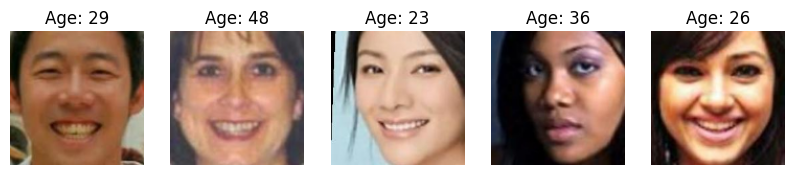

In [11]:
# Display some samples
display_samples(x_train,y_train)

In [12]:
# Import necessary libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

In [13]:
# Define the input shape
input_size = (128, 128, 3)

In [14]:
# Define the input layer
inputs = Input(shape=input_size)

# Convo block 1
X = Conv2D(32, (3, 3), activation='relu')(inputs)
X = BatchNormalization(axis=3)(X)
X = MaxPooling2D((3, 3))(X)

# Convo block 2
X = Conv2D(64, (3, 3), activation='relu')(inputs)
X = BatchNormalization(axis=3)(X)
X = MaxPooling2D((3, 3))(X)

# Convo block 3
X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

# Convo block 4
X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

# Flatten layer
X = Flatten()(X)

# Dense layers
dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu')(dense_1)
dense_3 = Dense(128, activation='relu')(dense_2)

# Dropout layers
dropout_1 = Dropout(0.5)(dense_1)
dropout_2 = Dropout(0.5)(dense_3)

# Output layer for age prediction
output_2 = Dense(1, name='age_output')(dropout_2)

# Define the model
model = Model(inputs=inputs, outputs=output_2)

model.compile(loss='mae', optimizer='adam', metrics=['mae'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization_1 (Bat  (None, 126, 126, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 42, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0     

In [15]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
593/593 [==============================] - 21s 27ms/step - loss: 12.7114 - mae: 12.7114 - val_loss: 13.2893 - val_mae: 13.2893
Epoch 2/20
593/593 [==============================] - 14s 23ms/step - loss: 9.5612 - mae: 9.5612 - val_loss: 7.3861 - val_mae: 7.3861
Epoch 3/20
593/593 [==============================] - 14s 23ms/step - loss: 8.6192 - mae: 8.6192 - val_loss: 12.1782 - val_mae: 12.1782
Epoch 4/20
593/593 [==============================] - 13s 23ms/step - loss: 8.2333 - mae: 8.2333 - val_loss: 7.3140 - val_mae: 7.3140
Epoch 5/20
593/593 [==============================] - 13s 23ms/step - loss: 7.8234 - mae: 7.8234 - val_loss: 6.7660 - val_mae: 6.7660
Epoch 6/20
593/593 [==============================] - 13s 22ms/step - loss: 7.4614 - mae: 7.4614 - val_loss: 6.9553 - val_mae: 6.9553
Epoch 7/20
593/593 [==============================] - 13s 23ms/step - loss: 7.1927 - mae: 7.1927 - val_loss: 6.4125 - val_mae: 6.4125
Epoch 8/20
593/593 [==============================] - 13

In [ ]:
# Save the model
model.save('age_model_pretrained.h5')

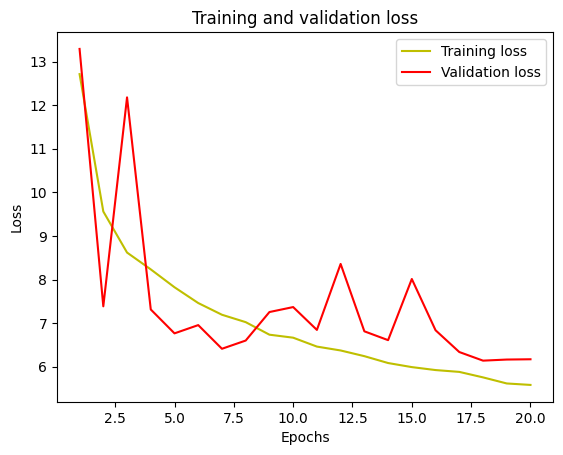

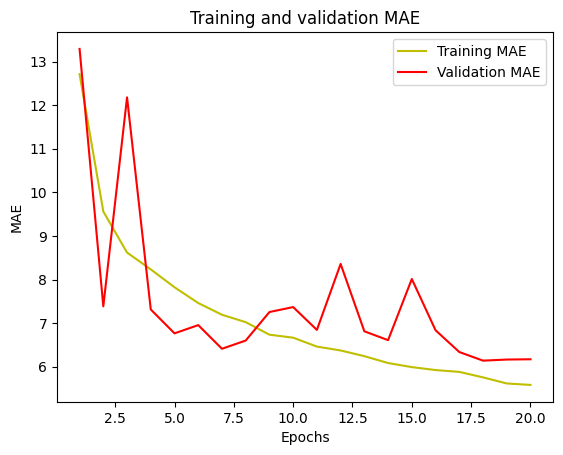

In [16]:
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot the training and validation MAE
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# Load the saved model
age_model = load_model('age_model_pretrained.h5', compile=False)

In [ ]:
# Test the model
predictions = age_model.predict(x_test)
# Evaluate the model
mae = np.mean(np.abs(predictions - y_test))
print(f'Mean Absolute Error on test set: {mae}')